In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
upload= files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [ ]:
data_train=pd.read_csv('SalaryData_Train(1).csv')
data_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [ ]:
data_test=pd.read_csv('SalaryData_Test(1).csv')
data_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [ ]:
data_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
data_train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [ ]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for i in columns:
  print(i,":",'\t')
  print(data_train[i].value_counts())

workclass : 	
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education : 	
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
maritalstatus : 	
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
occupation : 	
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992

##**VISUALIZATION**

<Axes: xlabel='Salary', ylabel='count'>

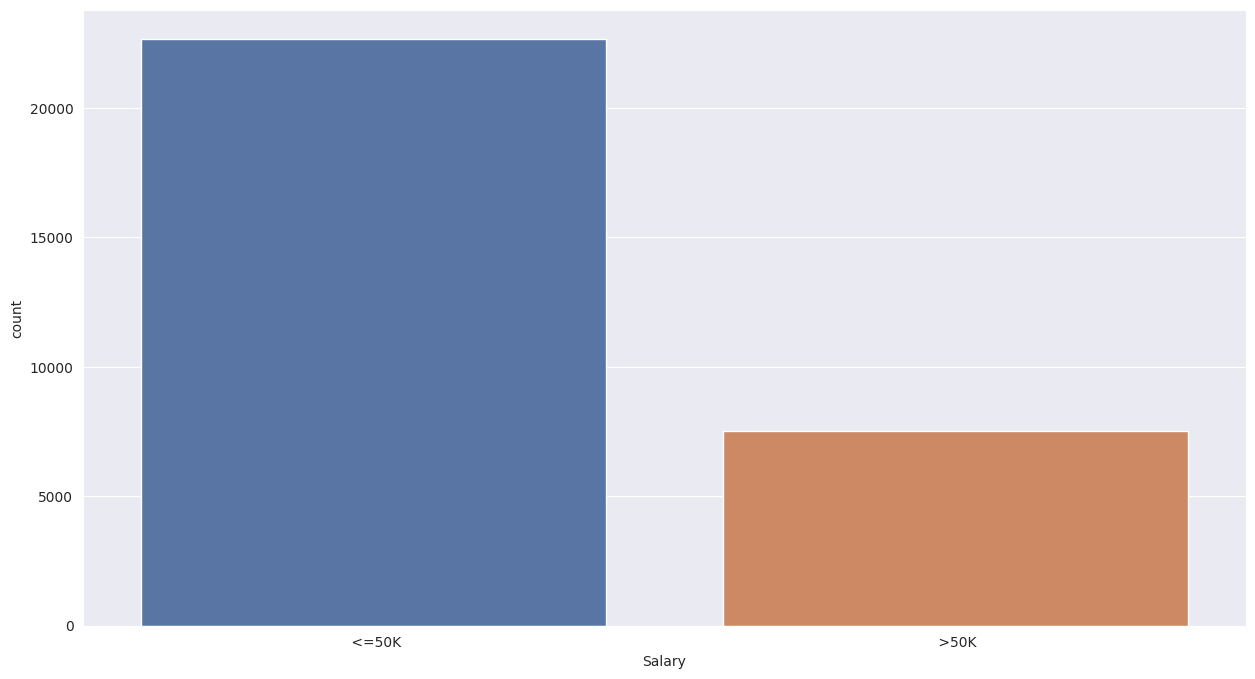

In [ ]:
sns.countplot(x=data_train['Salary'])

workclass
Axes(0.125,0.11;0.775x0.77)
education
Axes(0.125,0.11;0.775x0.77)
maritalstatus
Axes(0.125,0.11;0.775x0.77)
occupation
Axes(0.125,0.11;0.775x0.77)
relationship
Axes(0.125,0.11;0.775x0.77)
race
Axes(0.125,0.11;0.775x0.77)
sex
Axes(0.125,0.11;0.775x0.77)
Salary
Axes(0.125,0.11;0.775x0.77)


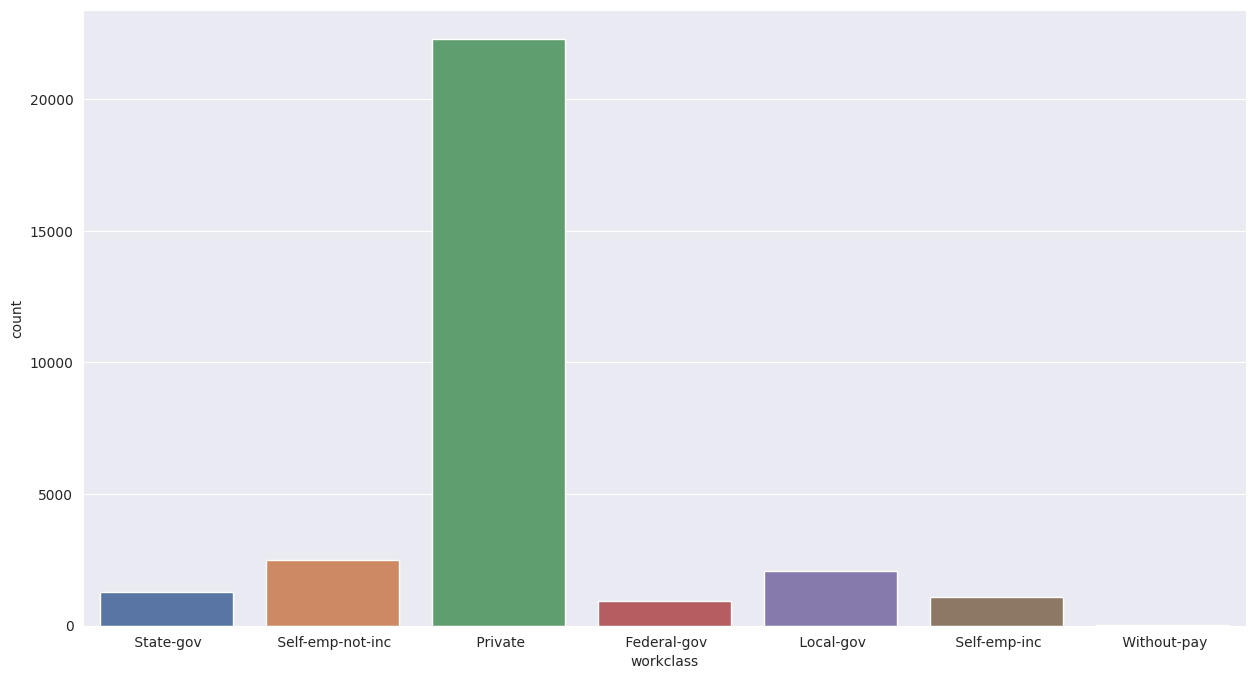

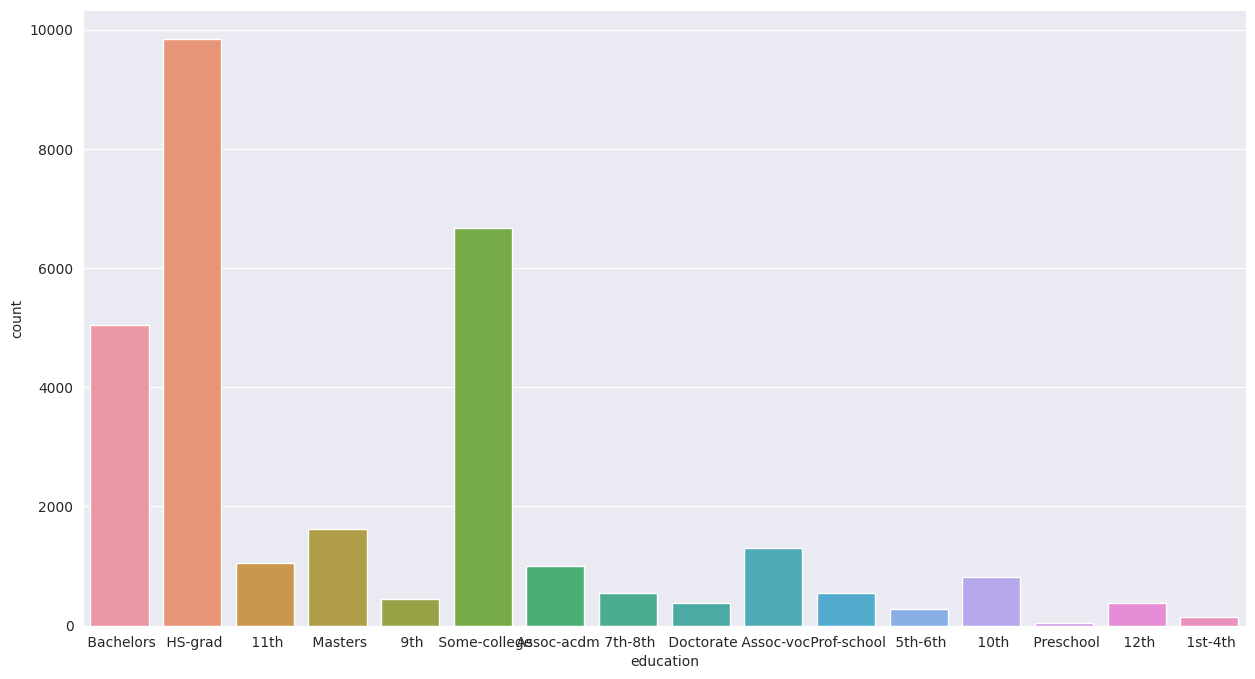

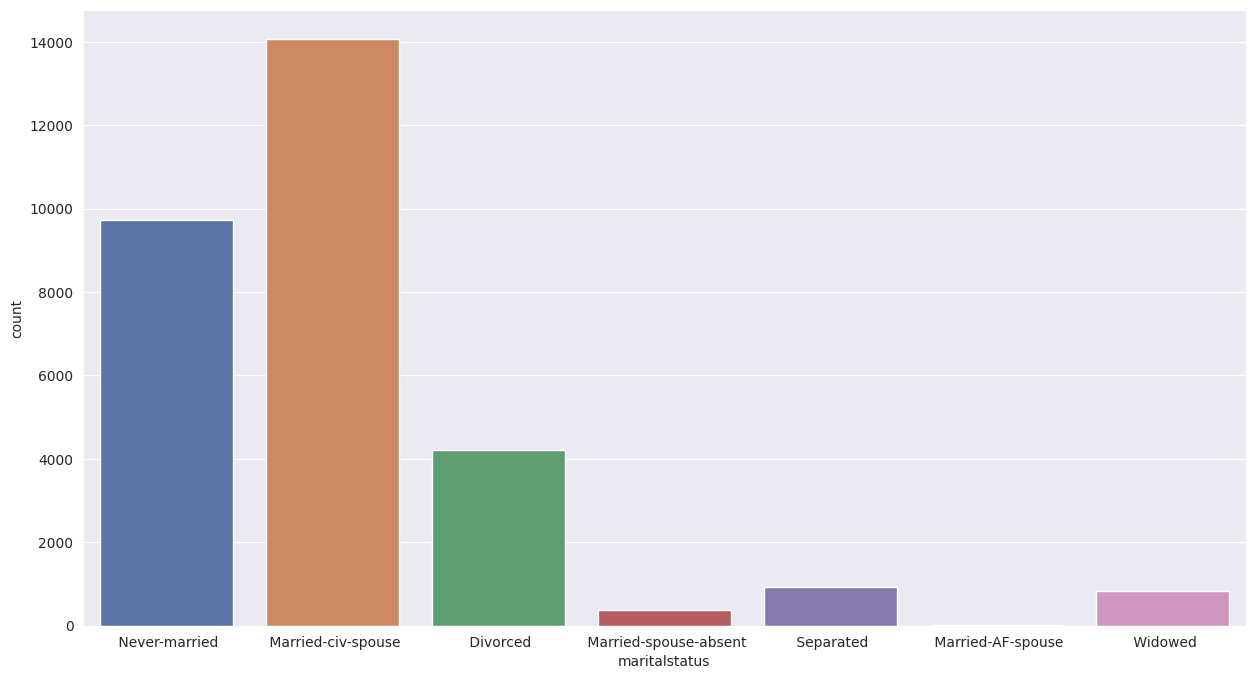

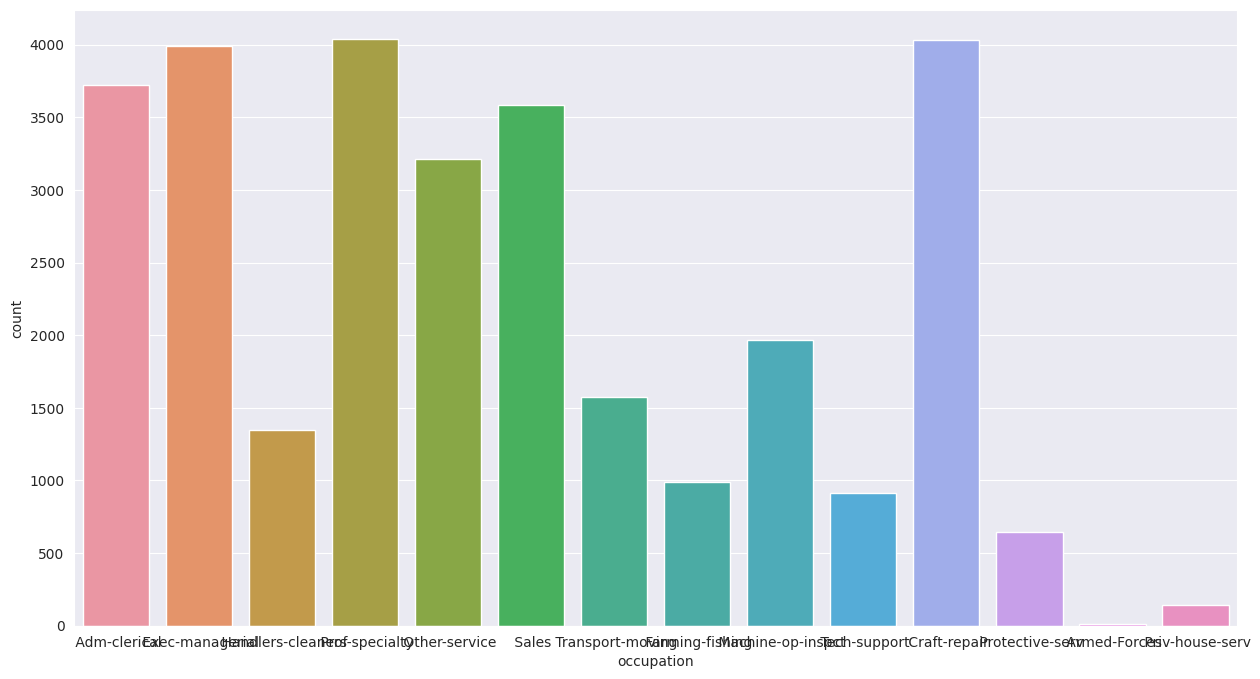

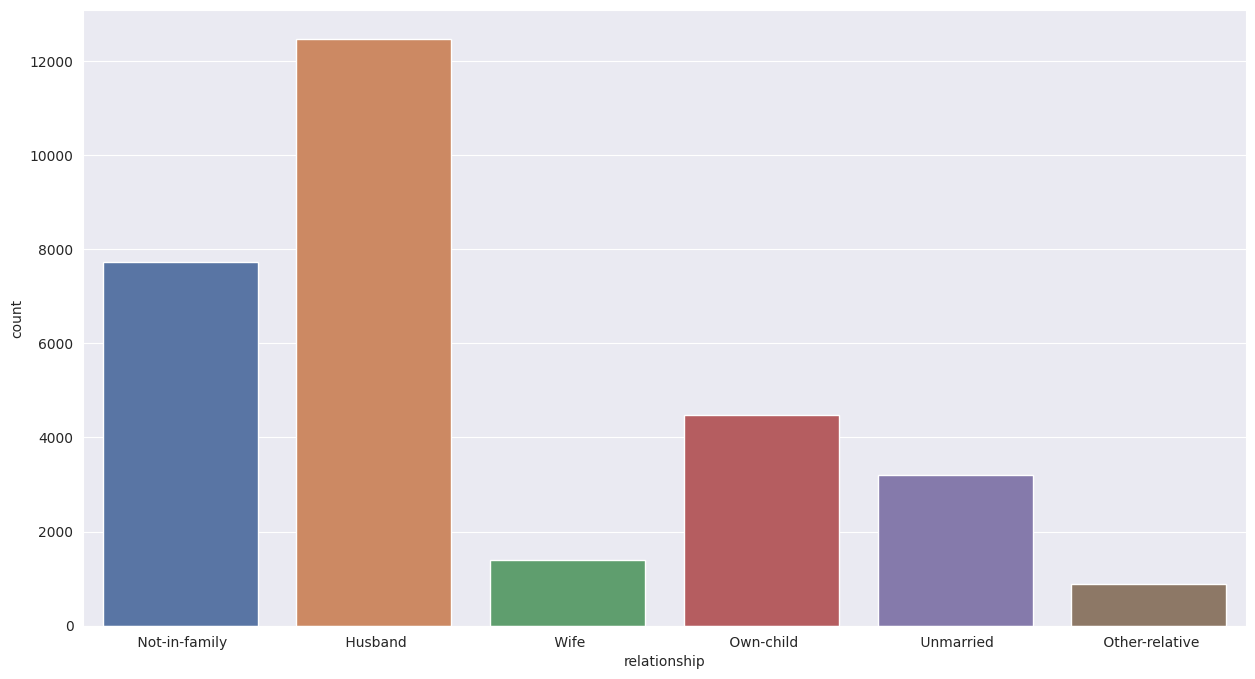

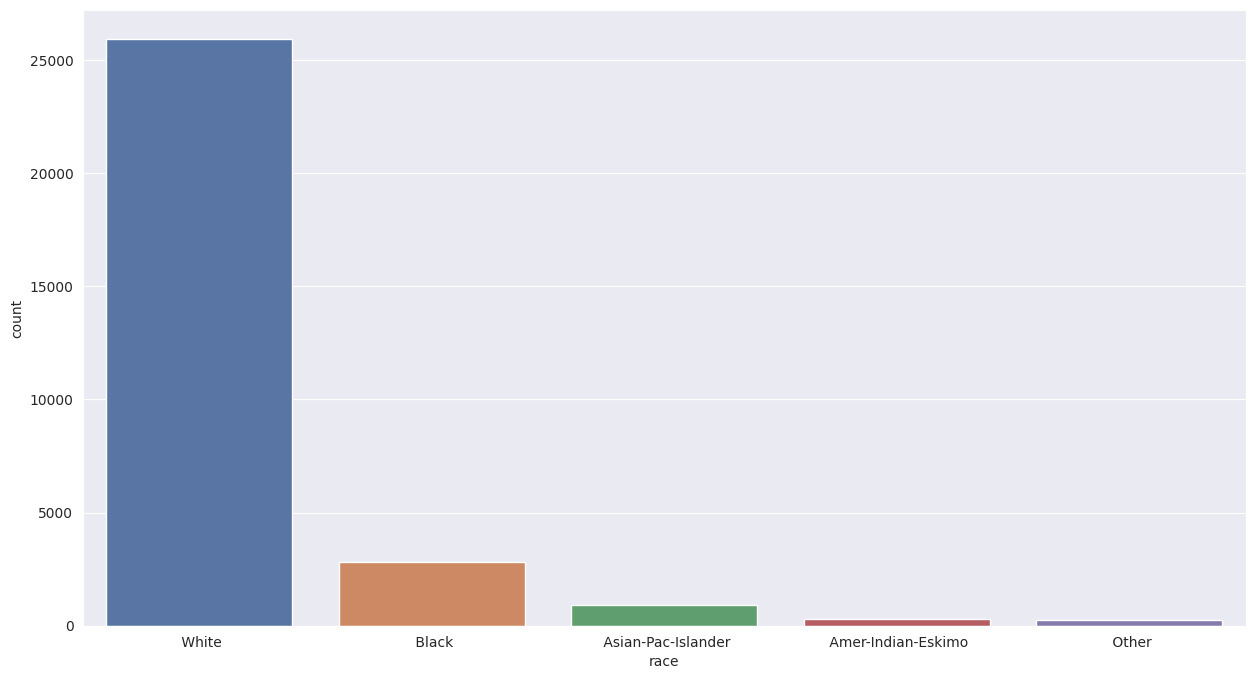

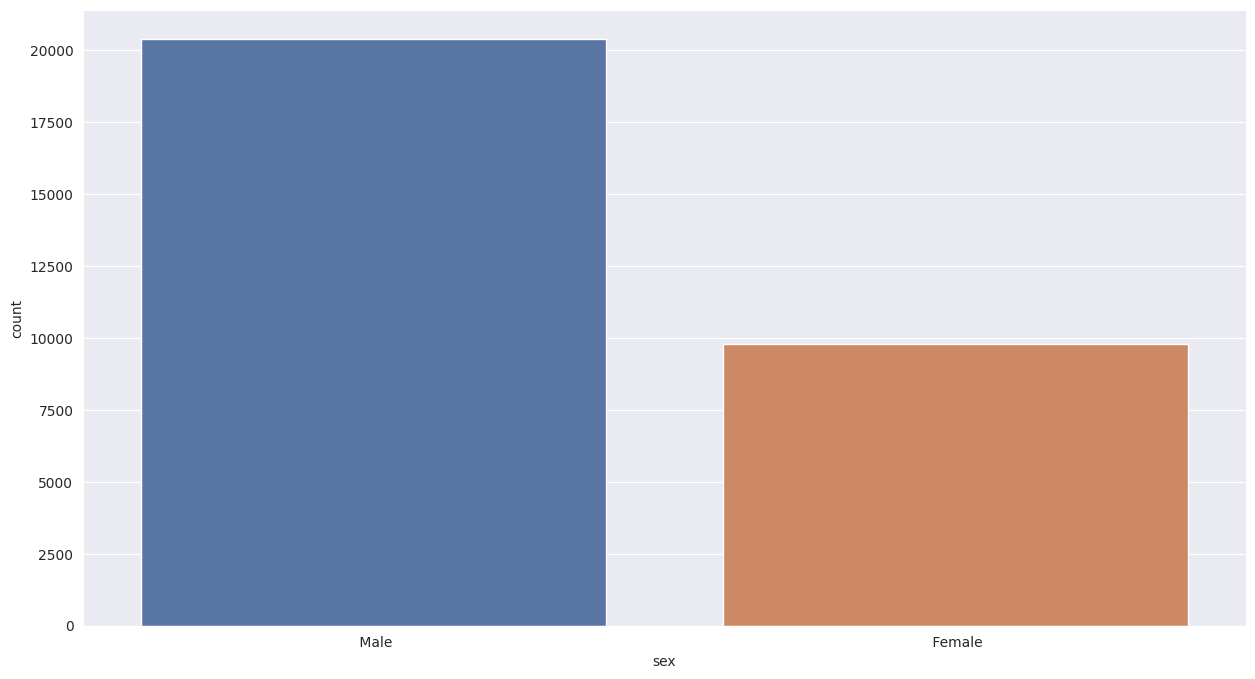

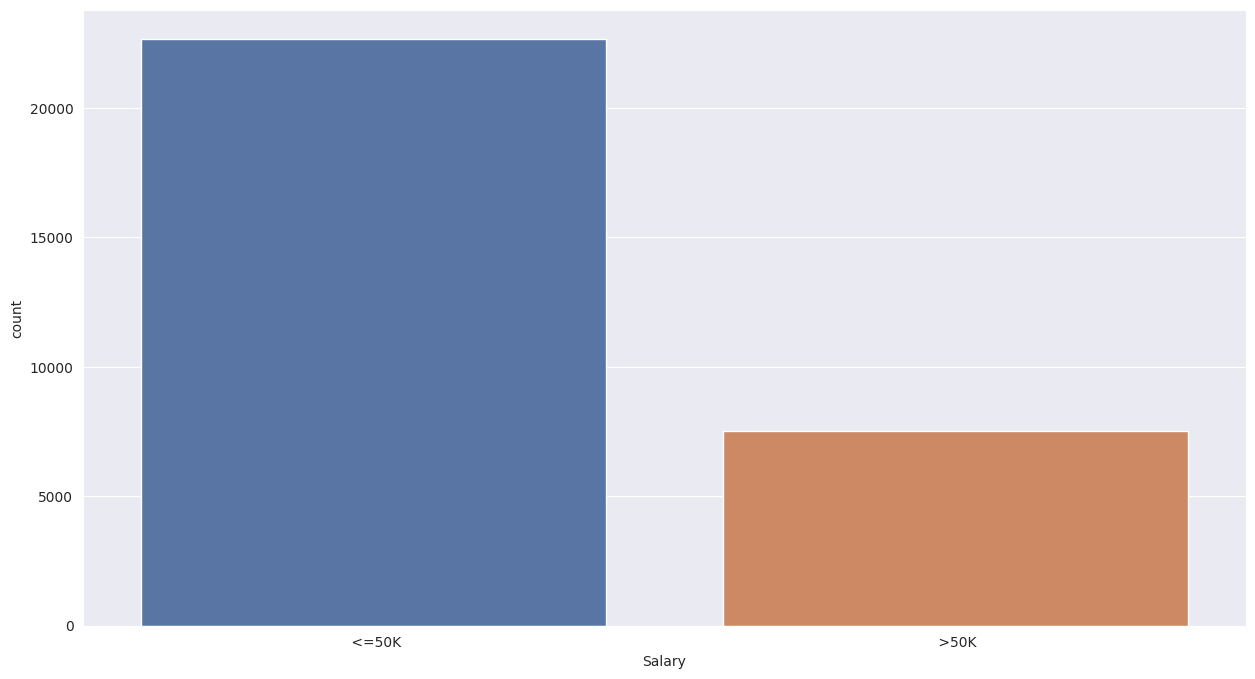

In [ ]:
columns=['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
sns.set({'figure.figsize':(15,8)})
for i in columns:
  plt.figure()
  print(i)
  print(sns.countplot(x=i,data=data_train))

In [ ]:
fig=px.pie(data_train,values='Salary',names='sex',hover_data=['Salary','sex'],labels={'Salary','sex'})
fig.show()

##**From this obsevation we can say that Men is doing more compared to Female with respect to job and also men**

In [ ]:
data_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [ ]:
fig=px.histogram(data_train,x='occupation',y='Salary',text_auto=True,color='occupation')
fig.show()

**With respect to Occupation exec-managerial is having the salary >=50K**

In [ ]:
fig=px.histogram(data_train,x='workclass',y='Salary')
fig.show()

<Axes: xlabel='capitalgain', ylabel='Density'>

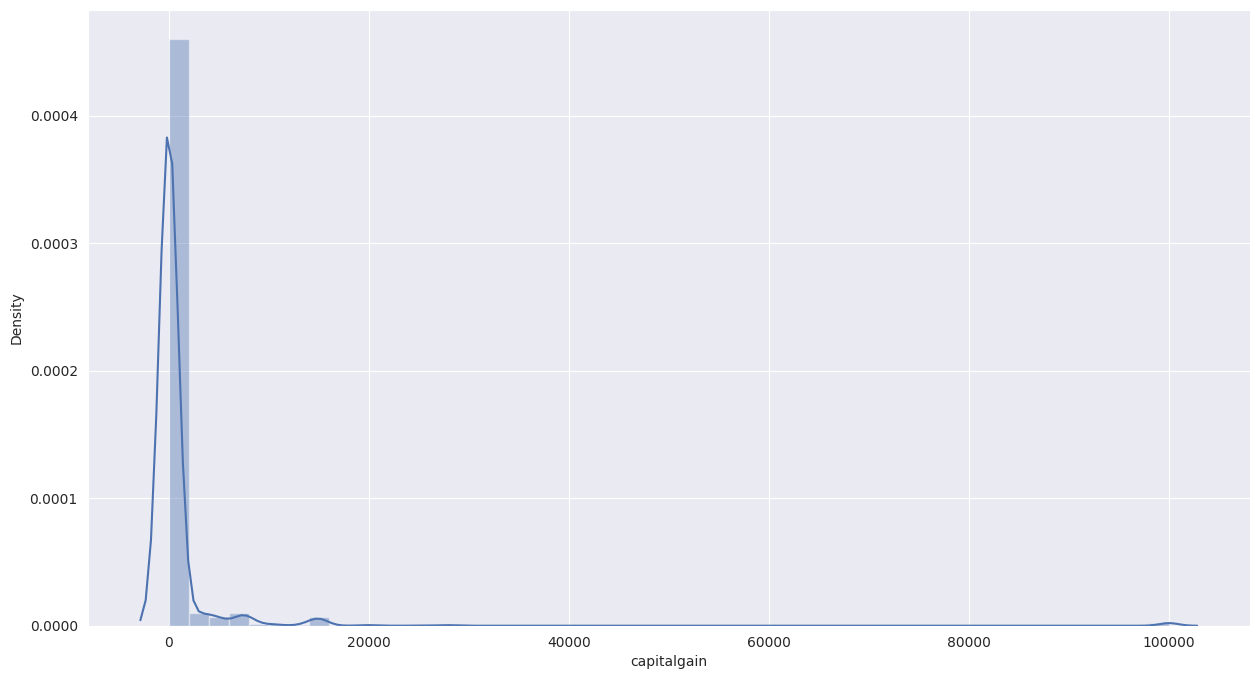

In [ ]:
sns.distplot(data_train['capitalgain'])

<Axes: xlabel='capitalloss', ylabel='Density'>

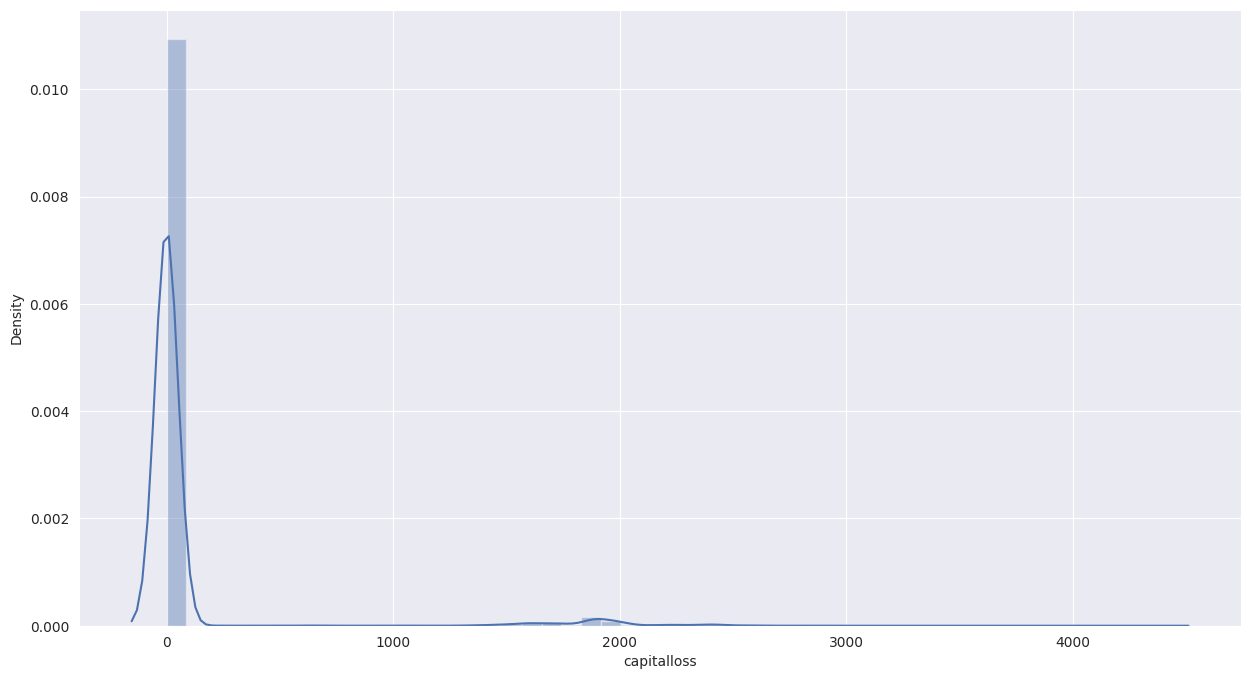

In [ ]:
sns.distplot(data_train['capitalloss'])

**Private Sector is having the salary >=50K**

##**feature engineering**

In [ ]:
le=LabelEncoder()
data_train['Salary']=le.fit_transform(data_train['Salary'])

In [ ]:
columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data_train[i]=le.fit_transform(data_train[i])

data_train

age  workclass  education  educationno  maritalstatus  occupation  \
0       22          5          9           12              4           0   
1       33          4          9           12              2           3   
2       21          2         11            8              0           5   
3       36          2          1            6              2           5   
4       11          2          9           12              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   10          2          7           11              2          12   
30157   23          2         11            8              2           6   
30158   41          2         11            8              6           0   
30159    5          2         11            8              4           0   
30160   35          3         11            8              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1           24            0            39   
1                 0     4    1            0            0            12   
2                 1     4    1            0            0            39   
3                 0     2    1            0            0            39   
4                 5     2    0            0            0            39   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            37   
30157             0     4    1            0            0            39   
30158             4     4    0            0            0            39   
30159             3     4    1            0            0            19   
30160             5     4    0          107            0            39   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [ ]:
le=LabelEncoder()

columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native','Salary']
for i in columns:
  data_test[i]=le.fit_transform(data_test[i])

data_test

age  workclass  education  educationno  maritalstatus  occupation  \
0        8          2          1            6              4           6   
1       21          2         11            8              2           4   
2       11          1          7           11              2          10   
3       27          2         15            9              2           6   
4       17          2          0            5              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   16          2          9           12              4           9   
15056   22          2          9           12              0           9   
15057   21          2          9           12              2           9   
15058   27          2          9           12              0           0   
15059   18          3          9           12              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            39   
1                 0     4    1            0            0            49   
2                 0     4    1            0            0            39   
3                 0     2    1           87            0            39   
4                 1     4    1            0            0            29   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            39   
15056             1     4    0            0            0            35   
15057             0     4    1            0            0            49   
15058             3     1    1           73            0            39   
15059             0     4    1            0            0            59   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

###**SPLITING DATA**

In [ ]:
x_train1=data_train.iloc[:,:-1]
y_train1=data_train.iloc[:,-1]

In [ ]:
x_test1=data_test.iloc[:,:-1]
y_test1=data_test.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=0.2)

##**MODEL BUILDING LINEAR**

In [ ]:
model=SVC(kernel='linear',C=0.01,gamma=0.1)
model.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [ ]:
y_pred_train=model.predict(x_train)

In [ ]:
model.score(x_train,y_train)

0.8062417108753316

In [ ]:
y_pred_test=model.predict(x_test)

In [ ]:
accur_train=accuracy_score(y_test,y_pred_test)

In [ ]:
print('Accuracy of train_dastaset :',accur_train)

Accuracy of train_dastaset : 0.7992706779380077


In [ ]:
new_pred=model.predict(x_test1)

In [ ]:
accu_test=accuracy_score(y_test1,new_pred)

In [ ]:
print('Accuracy of test_dastaset :',accu_test)

Accuracy of test_dastaset : 0.8037848605577689
